In [1]:
# https://pythex.org/

# UTC vs LST (good discussion topic)
# Look at learned parameters
# Plot on map

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from datetime import date
from pathlib import Path
from regex import search

In [2]:
!ls ../Data

weather


In [3]:
!ls ../Data/weather/

2011  2013  2015  2017  2019  Elevation.bz2  README.txt
2012  2014  2016  2018  2020  HEADERS.txt    stations.tsv


In [4]:
data_dir = Path("../Data/weather/")

In [5]:
data_header_filename = data_dir / "HEADERS.txt"

with open(data_header_filename) as data_header_file:
    data_header = [line.split() for line in data_header_file]

all_header_names = data_header[1]

for i, name in enumerate(all_header_names):
    print(f"{i:>2} : {name}")

 0 : WBANNO
 1 : UTC_DATE
 2 : UTC_TIME
 3 : LST_DATE
 4 : LST_TIME
 5 : CRX_VN
 6 : LONGITUDE
 7 : LATITUDE
 8 : T_CALC
 9 : T_HR_AVG
10 : T_MAX
11 : T_MIN
12 : P_CALC
13 : SOLARAD
14 : SOLARAD_FLAG
15 : SOLARAD_MAX
16 : SOLARAD_MAX_FLAG
17 : SOLARAD_MIN
18 : SOLARAD_MIN_FLAG
19 : SUR_TEMP_TYPE
20 : SUR_TEMP
21 : SUR_TEMP_FLAG
22 : SUR_TEMP_MAX
23 : SUR_TEMP_MAX_FLAG
24 : SUR_TEMP_MIN
25 : SUR_TEMP_MIN_FLAG
26 : RH_HR_AVG
27 : RH_HR_AVG_FLAG
28 : SOIL_MOISTURE_5
29 : SOIL_MOISTURE_10
30 : SOIL_MOISTURE_20
31 : SOIL_MOISTURE_50
32 : SOIL_MOISTURE_100
33 : SOIL_TEMP_5
34 : SOIL_TEMP_10
35 : SOIL_TEMP_20
36 : SOIL_TEMP_50
37 : SOIL_TEMP_100


In [6]:
# Taking a guess at which columns to keep
cols_to_keep = [0, 1, 2, 3, 4, 6, 7, 9, 13, 20, 26]
header_names = [h for i, h in enumerate(all_header_names) if i in cols_to_keep]

In [7]:
all_dfs = []

# Missing data given as -9999.0 for 7-character fields with one decimal
# and -99.000 for 7-charcter fields with three decimal places
na_values = ["-9999.0", "-99.000"]

# Also found -99999.0 when looking at the data
na_values.append("-99999.0")

year_dirs = sorted([yd for yd in data_dir.iterdir() if yd.is_dir()])

for year_dir in year_dirs:

    print("Processing data in", str(year_dir))

    for data_filename in year_dir.glob("*.txt"):

        # Grab the year, state, and site information
        if match := search(
            "^CRNH.*-(\d{4})-([A-Z]+)_([A-Za-z]+).*", data_filename.name
        ):
            year, state, site = match.group(1), match.group(2), match.group(3)
        else:
            print("No match for", data_filename.name)

        # Skip Alaska and Hawaii to make the problem easier
        if state == "AK" or state == "HI":
            continue

        df = pd.read_csv(
            data_filename,
            names=header_names,
            usecols=cols_to_keep,
            delim_whitespace=True,
            na_values=na_values,
        )

        df["STATE"] = state
        df["SITE"] = site

        all_dfs.append(df)

Processing data in ../Data/weather/2011
Processing data in ../Data/weather/2012
Processing data in ../Data/weather/2013
Processing data in ../Data/weather/2014
Processing data in ../Data/weather/2015
Processing data in ../Data/weather/2016
Processing data in ../Data/weather/2017
Processing data in ../Data/weather/2018
Processing data in ../Data/weather/2019
Processing data in ../Data/weather/2020


In [8]:
# Examine a single file
df.describe()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG
count,8784.0,8.784000e+03,8784.000000,8.784000e+03,8784.000000,8.784000e+03,8784.00,8751.000000,8781.000000,8781.000000,8776.000000
mean,63856.0,2.020067e+07,1150.000000,2.020066e+07,1150.000000,-8.146000e+01,30.81,20.697200,118.685799,22.217299,79.588537
std,0.0,3.596328e+02,692.258061,3.995326e+02,692.258061,1.421166e-14,0.00,7.026316,171.470642,9.210573,15.321241
min,63856.0,2.020010e+07,0.000000,2.019123e+07,0.000000,-8.146000e+01,30.81,-3.100000,0.000000,-5.200000,22.000000
25%,63856.0,2.020040e+07,575.000000,2.020040e+07,575.000000,-8.146000e+01,30.81,16.700000,0.000000,16.700000,71.000000
50%,63856.0,2.020070e+07,1150.000000,2.020070e+07,1150.000000,-8.146000e+01,30.81,22.300000,4.000000,22.900000,83.000000
75%,63856.0,2.020100e+07,1725.000000,2.020100e+07,1725.000000,-8.146000e+01,30.81,25.600000,208.000000,27.600000,92.000000
max,63856.0,2.021010e+07,2300.000000,2.020123e+07,2300.000000,-8.146000e+01,30.81,34.900000,722.000000,46.300000,100.000000


In [9]:
df.head()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG,STATE,SITE
0,63856,20200101,100,20191231,2000,-81.46,30.81,8.8,0.0,6.0,78.0,GA,Brunswick
1,63856,20200101,200,20191231,2100,-81.46,30.81,8.5,0.0,5.1,83.0,GA,Brunswick
2,63856,20200101,300,20191231,2200,-81.46,30.81,10.3,0.0,6.6,66.0,GA,Brunswick
3,63856,20200101,400,20191231,2300,-81.46,30.81,9.9,0.0,6.7,67.0,GA,Brunswick
4,63856,20200101,500,20200101,0,-81.46,30.81,9.8,0.0,6.8,66.0,GA,Brunswick


In [10]:
df = pd.concat(all_dfs, ignore_index=True)
df.shape

(13748470, 13)

In [11]:
# Remove all rows containing invalid/incomplete data
df = df.dropna()
df.shape

(9966607, 13)

In [12]:
df.dtypes

WBANNO        object
UTC_DATE      object
UTC_TIME      object
LST_DATE      object
LST_TIME      object
LONGITUDE    float64
LATITUDE     float64
T_HR_AVG     float64
SOLARAD      float64
SUR_TEMP     float64
RH_HR_AVG    float64
STATE         object
SITE          object
dtype: object

In [13]:
# Convert UTC_DATE and LST_DATE to day of year

def convert_to_dayofyear(d):
    year = d // 10000
    month = d % 10000 // 100
    day = d % 100
    d_iso = f"{year}-{month:>02}-{day:>02}"
    return date.fromisoformat(d_iso).timetuple().tm_yday

df["UTC_DATE"] = df["UTC_DATE"].apply(convert_to_dayofyear)
df["LST_DATE"] = df["LST_DATE"].apply(convert_to_dayofyear)

In [14]:
df.dtypes

WBANNO        object
UTC_DATE       int64
UTC_TIME      object
LST_DATE       int64
LST_TIME      object
LONGITUDE    float64
LATITUDE     float64
T_HR_AVG     float64
SOLARAD      float64
SUR_TEMP     float64
RH_HR_AVG    float64
STATE         object
SITE          object
dtype: object

In [15]:
df.head()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG,STATE,SITE
14811,53155,1,100,365,1800,-112.34,35.76,-13.2,15.0,-14.9,63.0,AZ,Williams
14812,53155,1,200,365,1900,-112.34,35.76,-13.5,0.0,-17.1,64.0,AZ,Williams
14813,53155,1,300,365,2000,-112.34,35.76,-13.5,0.0,-17.5,60.0,AZ,Williams
14814,53155,1,400,365,2100,-112.34,35.76,-15.9,0.0,-18.3,69.0,AZ,Williams
14815,53155,1,500,365,2200,-112.34,35.76,-18.7,0.0,-19.6,78.0,AZ,Williams


In [16]:
# Convert objects to floats

cols_to_convert = [
    "UTC_DATE",
    "UTC_TIME",
    "LST_DATE",
    "LST_TIME",
    "SOLARAD",
]

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], downcast='float')

In [17]:
df.dtypes

WBANNO        object
UTC_DATE     float32
UTC_TIME     float32
LST_DATE     float32
LST_TIME     float32
LONGITUDE    float64
LATITUDE     float64
T_HR_AVG     float64
SOLARAD      float32
SUR_TEMP     float64
RH_HR_AVG    float64
STATE         object
SITE          object
dtype: object

In [18]:
df.head()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG,STATE,SITE
14811,53155,1.0,100.0,365.0,1800.0,-112.34,35.76,-13.2,15.0,-14.9,63.0,AZ,Williams
14812,53155,1.0,200.0,365.0,1900.0,-112.34,35.76,-13.5,0.0,-17.1,64.0,AZ,Williams
14813,53155,1.0,300.0,365.0,2000.0,-112.34,35.76,-13.5,0.0,-17.5,60.0,AZ,Williams
14814,53155,1.0,400.0,365.0,2100.0,-112.34,35.76,-15.9,0.0,-18.3,69.0,AZ,Williams
14815,53155,1.0,500.0,365.0,2200.0,-112.34,35.76,-18.7,0.0,-19.6,78.0,AZ,Williams


In [19]:
# Sanity check by looking at temperature
df["T_HR_AVG"].describe()

count    9.966607e+06
mean     1.221780e+01
std      1.164920e+01
min     -4.370000e+01
25%      3.900000e+00
50%      1.310000e+01
75%      2.110000e+01
max      5.170000e+01
Name: T_HR_AVG, dtype: float64

In [20]:
# Look for correlations among columns
# - Some should be obvious like T_HR_AVG and SUR_TEMP

cor = df.corr()
cor

,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG
UTC_DATE,1.000000,0.000093,0.995744,0.000091,-0.003706,0.003145,0.151955,-0.037822,0.119995,0.034059
UTC_TIME,0.000093,1.000000,0.000119,-0.150801,-0.000120,0.000140,0.117278,0.602748,0.263089,-0.185467
LST_DATE,0.995744,0.000119,1.000000,0.000059,-0.003705,0.003138,0.149096,-0.038113,0.117547,0.034810
LST_TIME,0.000091,-0.150801,0.000059,1.000000,0.000007,-0.000039,0.152220,0.118418,0.155003,-0.224884
LONGITUDE,-0.003706,-0.000120,-0.003705,0.000007,1.000000,-0.179043,0.052779,-0.034170,0.019612,0.285188
LATITUDE,0.003145,0.000140,0.003138,-0.000039,-0.179043,1.000000,-0.409563,-0.060005,-0.364991,0.047277
T_HR_AVG,0.151955,0.117278,0.149096,0.152220,0.052779,-0.409563,1.000000,0.407342,0.941398,-0.303362
SOLARAD,-0.037822,0.602748,-0.038113,0.118418,-0.034170,-0.060005,0.407342,1.000000,0.606989,-0.462678
SUR_TEMP,0.119995,0.263089,0.117547,0.155003,0.019612,-0.364991,0.941398,0.606989,1.000000,-0.351202
RH_HR_AVG,0.034059,-0.185467,0.034810,-0.224884,0.285188,0.047277,-0.303362,-0.462678,-0.351202,1.000000


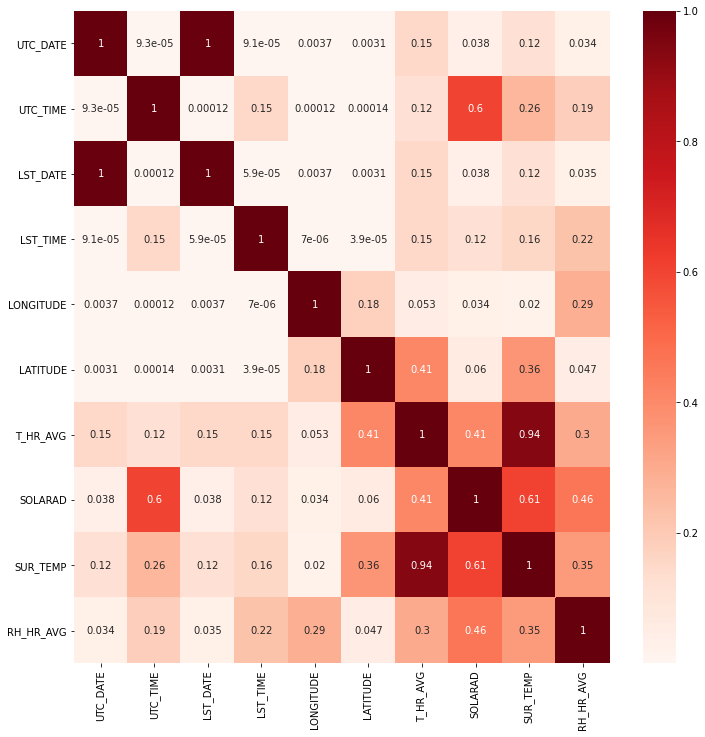

In [21]:
_, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cor.abs(), annot=True, cmap=plt.cm.Reds, ax=ax)
plt.yticks(rotation=0);

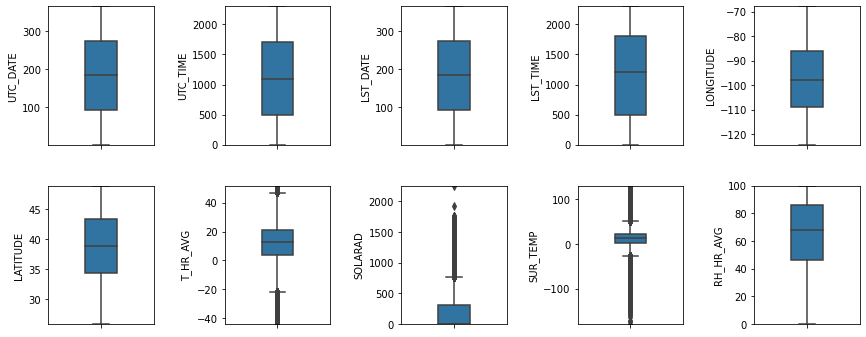

In [22]:
# Check for outliers

selection = [
    "UTC_DATE",
    "UTC_TIME",
    "LST_DATE",
    "LST_TIME",
    "LONGITUDE",
    "LATITUDE",
    "T_HR_AVG",
    "SOLARAD",
    "SUR_TEMP",
    "RH_HR_AVG",
]

fig, axes = plt.subplots(2, len(selection) // 2, figsize=(12, 5))
fig.tight_layout(h_pad=2, w_pad=4)

for col, ax in zip(selection, axes.flat):

    ax = sns.boxplot(y=df[col], ax=ax, width=0.3)
    ax.set_ylim(df[col].min(), df[col].max())
    ax.set_ylabel(col)

In [23]:
df["SOLARAD"].min() # Found missing data with min

0.0

<AxesSubplot:>

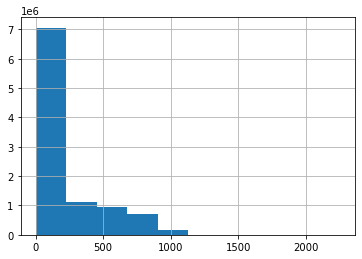

In [24]:
df["SOLARAD"].hist() # Looks like a lot of zero values?

<AxesSubplot:xlabel='LST_TIME', ylabel='T_HR_AVG'>

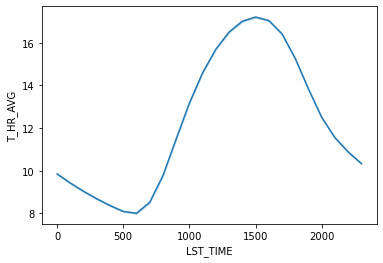

In [25]:
sns.lineplot(data=df, x="LST_TIME", y="T_HR_AVG")

<AxesSubplot:xlabel='LATITUDE', ylabel='T_HR_AVG'>

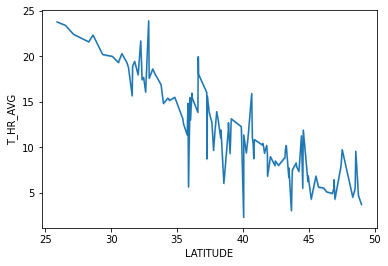

In [26]:
sns.lineplot(data=df, x="LATITUDE", y="T_HR_AVG")

<AxesSubplot:xlabel='LONGITUDE', ylabel='T_HR_AVG'>

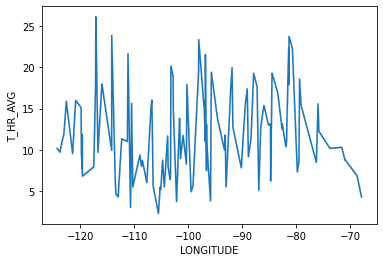

In [27]:
sns.lineplot(data=df, x="LONGITUDE", y="T_HR_AVG")

In [28]:
# Add elevation data
df_elev = pd.read_pickle(data_dir / "Elevation.bz2")
df_elev = df_elev[df_elev["WBAN"] != "UN"]
df_elev.dropna(inplace=True)
df_elev["WBAN"] = df_elev["WBAN"].apply(int)
df_elev

,WBAN,LATITUDE,LONGITUDE,ELEVATION
0,3047,31.62,-102.80,829.32
1,3048,34.35,-106.88,1470.51
2,3054,33.95,-102.77,1137.76
3,3055,36.59,-101.59,990.17
4,3060,38.54,-107.69,2560.33
...,...,...,...,...
230,96405,60.47,-145.35,23.68
231,96406,64.50,-154.12,-1000000
232,96407,66.56,-159.00,1.5
233,96408,63.45,-150.87,646.11


In [29]:
elevations = {
    int(wban): elev for wban, elev in zip(df_elev["WBAN"], df_elev["ELEVATION"])
}

In [30]:
# Check that all stations in df can be found in elev_stations
for i, sid in enumerate(df["WBANNO"].unique()):
    assert sid in elevations

In [31]:
def get_station_elevation(row):
    return elevations[row["WBANNO"]]

In [32]:
df["ELEVATION"] = df.apply(get_station_elevation, axis=1)
df.head()

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG,STATE,SITE,ELEVATION
14811,53155,1.0,100.0,365.0,1800.0,-112.34,35.76,-13.2,15.0,-14.9,63.0,AZ,Williams,1811.25
14812,53155,1.0,200.0,365.0,1900.0,-112.34,35.76,-13.5,0.0,-17.1,64.0,AZ,Williams,1811.25
14813,53155,1.0,300.0,365.0,2000.0,-112.34,35.76,-13.5,0.0,-17.5,60.0,AZ,Williams,1811.25
14814,53155,1.0,400.0,365.0,2100.0,-112.34,35.76,-15.9,0.0,-18.3,69.0,AZ,Williams,1811.25
14815,53155,1.0,500.0,365.0,2200.0,-112.34,35.76,-18.7,0.0,-19.6,78.0,AZ,Williams,1811.25


In [36]:
df.dtypes

WBANNO        object
UTC_DATE     float32
UTC_TIME     float32
LST_DATE     float32
LST_TIME     float32
LONGITUDE    float64
LATITUDE     float64
T_HR_AVG     float64
SOLARAD      float32
SUR_TEMP     float64
RH_HR_AVG    float64
STATE         object
SITE          object
ELEVATION     object
dtype: object

In [38]:
df["ELEVATION"] = pd.to_numeric(df["ELEVATION"], downcast='float')

In [39]:
df.dtypes

WBANNO        object
UTC_DATE     float32
UTC_TIME     float32
LST_DATE     float32
LST_TIME     float32
LONGITUDE    float64
LATITUDE     float64
T_HR_AVG     float64
SOLARAD      float32
SUR_TEMP     float64
RH_HR_AVG    float64
STATE         object
SITE          object
ELEVATION    float32
dtype: object

In [40]:
df.sample(n=10)

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LONGITUDE,LATITUDE,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG,STATE,SITE,ELEVATION
2213326,3758,74.0,700.0,74.0,200.0,-79.09,35.97,15.8,0.0,11.9,84.0,NC,Durham,164.000000
12469944,94085,151.0,300.0,150.0,2100.0,-100.35,44.02,20.0,0.0,16.2,52.0,SD,Pierre,617.559998
6274584,4128,270.0,2000.0,270.0,1200.0,-119.69,43.47,11.3,131.0,14.3,60.0,OR,Riley,1397.390015
11556794,54796,63.0,500.0,63.0,0.0,-71.54,41.49,0.0,0.0,-0.3,97.0,RI,Kingston,35.410000
11257587,93245,6.0,600.0,5.0,2200.0,-123.07,38.32,12.2,0.0,11.4,96.0,CA,Bodega,10.100000
4648276,23904,195.0,0.0,194.0,1800.0,-91.78,35.82,26.5,117.0,27.9,48.0,AR,Batesville,136.639999
6739257,63838,351.0,700.0,351.0,200.0,-84.75,38.09,2.1,0.0,2.6,93.0,KY,Versailles,254.339996
7044697,63849,60.0,300.0,59.0,2100.0,-86.23,37.25,1.4,0.0,1.3,50.0,KY,Bowling,228.339996
12735925,23909,267.0,1600.0,267.0,1000.0,-91.72,37.63,17.5,209.0,22.9,73.0,MO,Salem,345.600006
7630621,23907,18.0,1500.0,18.0,900.0,-98.08,30.62,9.8,154.0,5.5,41.0,TX,Austin,355.690002


In [42]:
# df.columns.to_list()
df = df[
    [
        "WBANNO",
        "STATE",
        "SITE",
        "UTC_DATE",
        "UTC_TIME",
        "LST_DATE",
        "LST_TIME",
        "LATITUDE",
        "LONGITUDE",
        "ELEVATION",
        "T_HR_AVG",
        "SOLARAD",
        "SUR_TEMP",
        "RH_HR_AVG",
    ]
]

df.sample(n=10)

,WBANNO,STATE,SITE,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LATITUDE,LONGITUDE,ELEVATION,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG
7776690,94079,NE,Whitman,264.0,2000.0,264.0,1300.0,42.07,-101.44,1071.489990,30.1,786.0,38.7,14.0
12174374,53136,NV,Mercury,245.0,1700.0,245.0,900.0,36.62,-116.02,993.739990,29.7,180.0,32.5,27.0
3546157,53151,CA,Fallbrook,73.0,200.0,72.0,1800.0,33.44,-117.19,194.520004,20.8,37.0,24.1,43.0
10693669,94079,NE,Whitman,179.0,1500.0,179.0,800.0,42.07,-101.44,1071.489990,22.9,277.0,25.6,85.0
11861887,3063,CO,La,365.0,1000.0,365.0,300.0,37.86,-103.82,1333.469971,-13.0,0.0,-12.3,77.0
8534169,3047,TX,Monahans,55.0,1100.0,55.0,500.0,31.62,-102.81,829.320007,-0.9,0.0,-2.4,92.0
1241659,23908,MO,Joplin,17.0,2100.0,17.0,1500.0,37.43,-94.58,285.579987,6.5,65.0,6.8,83.0
2164350,54795,NH,Durham,229.0,1500.0,229.0,1000.0,43.11,-70.95,9.840000,22.4,575.0,26.3,80.0
6067813,54811,IL,Shabbona,19.0,200.0,18.0,2000.0,41.84,-88.85,264.660004,-12.9,0.0,-16.2,89.0
7682249,4236,OR,Corvallis,344.0,1900.0,344.0,1100.0,44.42,-123.33,79.160004,10.2,164.0,10.0,76.0


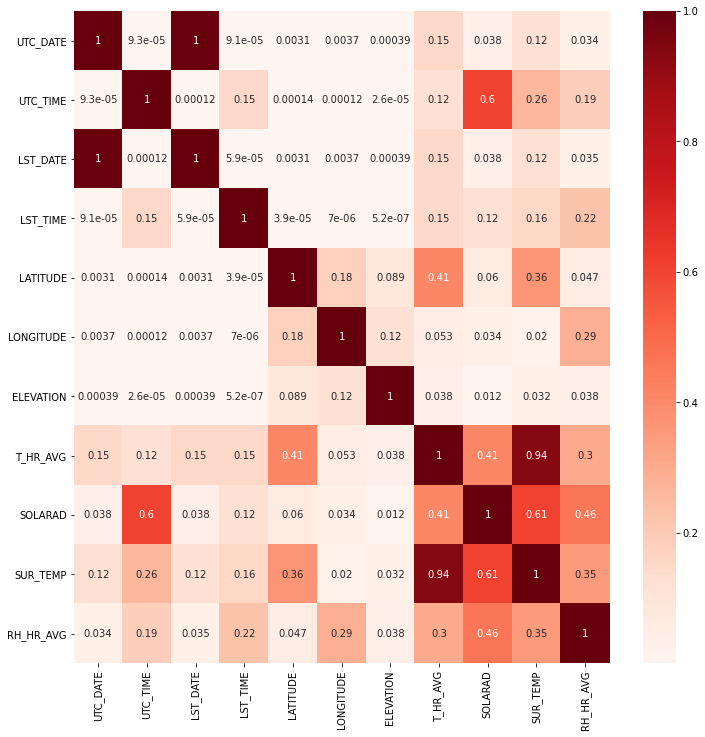

In [44]:
_, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr().abs(), annot=True, cmap=plt.cm.Reds, ax=ax)
plt.yticks(rotation=0);

In [43]:
df.to_pickle(data_dir / "USWeatherData2011To2020.bz2")